# CCL primeur

This notebook functions as a test, this wil just contain the "first steps" in CCL. The fact that I use Windows complicated the installation and set up enough to make the first run a decent result ;)

First try on installing CCL and running suggested testcode from github:

[8.68063554e-09 1.17960667e-08 1.30533061e-08 1.35122646e-08
 1.35757834e-08 1.34276818e-08 1.31622979e-08 1.28319516e-08]


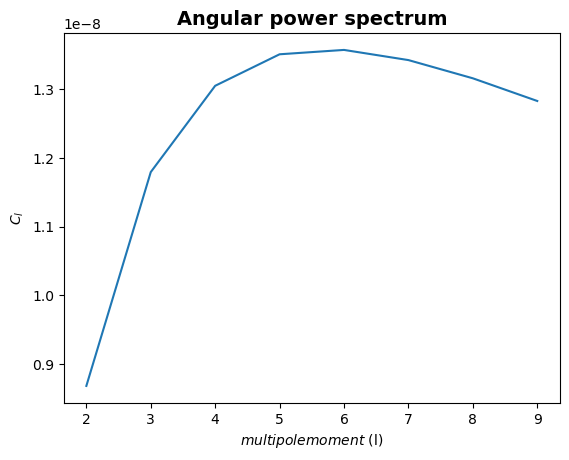

In [6]:
import pyccl as ccl
import numpy as np
import matplotlib.pyplot as plt

# Create new Cosmology object with a given set of parameters. This keeps track
# of previously-computed cosmological functions
cosmo = ccl.Cosmology(
    Omega_c=0.27, Omega_b=0.045, h=0.67, sigma8=0.8, n_s=0.96,
    transfer_function='bbks')

# Define a simple binned galaxy number density curve as a function of redshift
z_n = np.linspace(0., 1., 500)
n = np.ones(z_n.shape)

# Create objects to represent tracers of the weak lensing signal with this
# number density (with has_intrinsic_alignment=False)
lens1 = ccl.WeakLensingTracer(cosmo, dndz=(z_n, n))
lens2 = ccl.WeakLensingTracer(cosmo, dndz=(z_n, n))

# Calculate the angular cross-spectrum of the two tracers as a function of ell
ell = np.arange(2, 10)
cls = cosmo.angular_cl(lens1, lens2, ell)
print(cls)

plt.figure()
plt.plot(ell, cls)
plt.title("Angular power spectrum", weight="bold", fontsize=14)
plt.ylabel("$C_{l}$")
plt.xlabel("$multipolemoment$ (l)")
plt.show()
